In [1]:
import random

def monte_carlo_walk(start_node=2, right_prob=0.6, trials=10000):
    right_cliff_wins = 0
    
    for _ in range(trials):
        current_pos = start_node
        while 0 < current_pos < 4:  # While not at a cliff
            if random.random() < right_prob:
                current_pos += 1
            else:
                current_pos -= 1
        
        if current_pos == 4:
            right_cliff_wins += 1
            
    return right_cliff_wins / trials

print(f"Monte Carlo Probability: {monte_carlo_walk():.4f}")



import numpy as np

# Define the Transition Matrix
P = np.array([
    [1.0, 0.0, 0.0, 0.0, 0.0],  # State 0 (Cliff L) - Stays here
    [0.4, 0.0, 0.6, 0.0, 0.0],  # State 1
    [0.0, 0.4, 0.0, 0.6, 0.0],  # State 2 (Start)
    [0.0, 0.0, 0.4, 0.0, 0.6],  # State 3
    [0.0, 0.0, 0.0, 0.0, 1.0]   # State 4 (Cliff R) - Stays here
])

# Raise the matrix to a high power (e.g., 100) to find the stationary state
P_n = np.linalg.matrix_power(P, 1000)

# The row index 2 represents our starting state (Tile 2)
# The column index 4 represents the Right Cliff
prob_right_cliff = P_n[2, 4]

print(f"Matrix Method Probability: {prob_right_cliff:.4f}")


A = np.array([0, 0, 1, 0, 0])  # Initial state vector (starting at Tile 2)
prob_vector = A.dot(np.linalg.matrix_power(P, 1000))
print(f"Initial State Method Probability: {prob_vector[4]:.4f}")

Monte Carlo Probability: 0.6932
Matrix Method Probability: 0.6923
Initial State Method Probability: 0.6923


In [2]:
import random

def simulate_monopoly(total_steps=100000):
    board_size = 10
    counts = [0] * board_size
    current_pos = 0
    
    for _ in range(total_steps):
        # Roll a 4-sided die
        roll = random.randint(1, 4)
        current_pos = (current_pos + roll) % board_size
        
        # Rule: Square 7 sends you to Square 2
        if current_pos == 7:
            current_pos = 2
            
        counts[current_pos] += 1
        
    # Convert counts to probabilities
    probabilities = [c / total_steps for c in counts]
    return probabilities

print("Monte Carlo Probabilities:", simulate_monopoly())





import numpy as np

N = 10
P = np.zeros((N, N))

for i in range(N):
    for roll in [1, 2, 3, 4]:
        landing_square = (i + roll) % N
        
        # Apply the "Go To Jail" rule
        if landing_square == 7:
            landing_square = 2
            
        P[i, landing_square] += 0.25

# Solve for the stationary distribution: pi * P = pi
# One way is to raise P to a very high power
P_long_term = np.linalg.matrix_power(P, 100)

# All rows of P_long_term will converge to the stationary distribution pi
stationary_dist = P_long_term[0] 

print("Matrix Stationary Distribution:")
for i, prob in enumerate(stationary_dist):
    print(f"Square {i}: {prob:.4f}")

# assuming i start from a random state distribution i want to prove that no matter what i endup at the same stationary distribution
# initial_state = np.array([1/N] * N)  # Uniform distribution
initial_state = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])  # Starting at Square 2
final_state = initial_state.dot(np.linalg.matrix_power(P, 100))
print("Final State Distribution from Uniform Initial State:")
for i, prob in enumerate(final_state):
    print(f"Square {i}: {prob:.4f}")


Monte Carlo Probabilities: [0.07863, 0.06457, 0.1994, 0.10714, 0.11374, 0.12209, 0.13441, 0.0, 0.09258, 0.08744]
Matrix Stationary Distribution:
Square 0: 0.0788
Square 1: 0.0646
Square 2: 0.2000
Square 3: 0.1076
Square 4: 0.1127
Square 5: 0.1212
Square 6: 0.1354
Square 7: 0.0000
Square 8: 0.0924
Square 9: 0.0873
Final State Distribution from Uniform Initial State:
Square 0: 0.0788
Square 1: 0.0646
Square 2: 0.2000
Square 3: 0.1076
Square 4: 0.1127
Square 5: 0.1212
Square 6: 0.1354
Square 7: 0.0000
Square 8: 0.0924
Square 9: 0.0873


In [3]:
import numpy as np

# Define the Transition Matrix
P = np.array([
    [0.5, 0.2, 0.15, 0.15],  
    [0.0, 0.6, 0.23, 0.17],  
    [0.0, 0.0, 0.9, 0.1],  # State 3 (the only cliff)
    [0.0, 0.0, 0.0, 1.0]
])

# Raise the matrix to a high power (e.g., 100) to find the stationary state
P_n = np.linalg.matrix_power(P, 100)

print(f"Matrix Method Probability:", P_n)

A = np.array([1, 0, 0, 0])  
prob_vector = A.dot(np.linalg.matrix_power(P, 1000))
print(f"Initial State Method Probability: {prob_vector}")

Matrix Method Probability: [[7.88860905e-31 1.30663723e-22 2.01423942e-05 9.99979858e-01]
 [0.00000000e+00 6.53318624e-23 2.03637391e-05 9.99979636e-01]
 [0.00000000e+00 0.00000000e+00 2.65613989e-05 9.99973439e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Initial State Method Probability: [9.33263619e-302 2.83322052e-222 1.32546903e-046 1.00000000e+000]


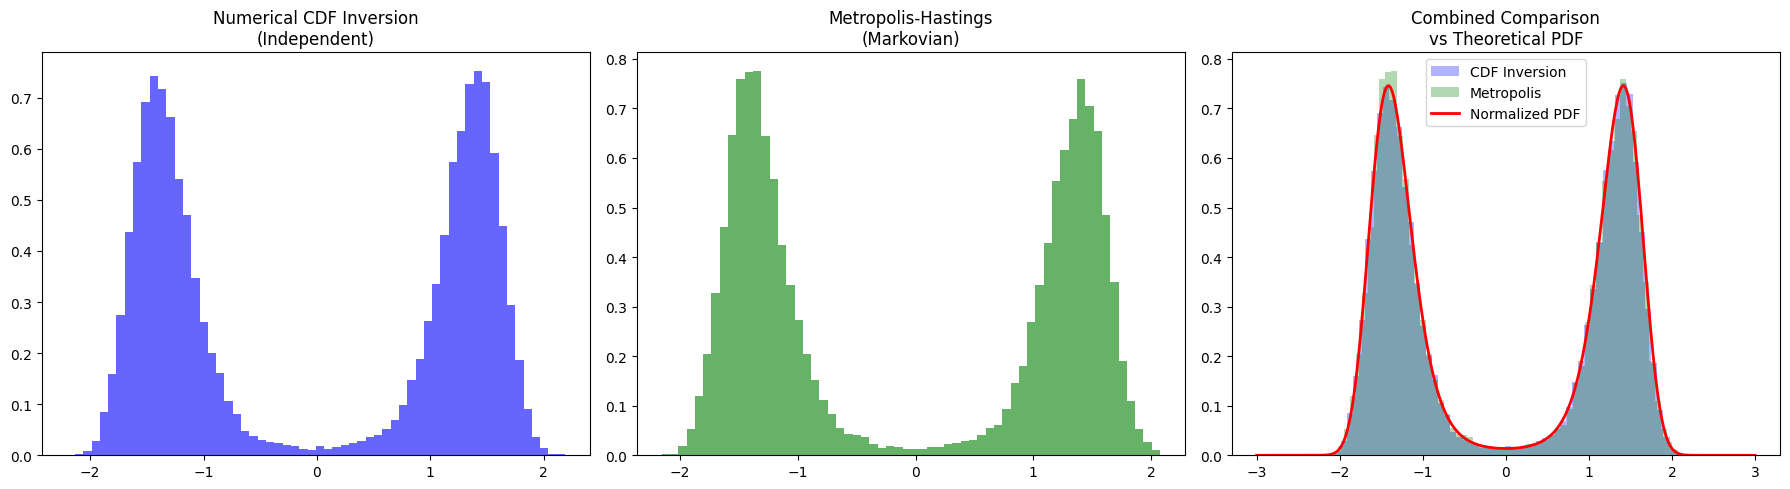

1.3404451183325452 1.340445118332564


In [4]:

'''
CDF inversion vs Metropolis Hastings
'''

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import quad

# The "Target" PDF (Unnormalized)
def target_pdf(x):
    return np.exp(-(x**2 - 2)**2)

# --- 0. PRE-CALCULATION FOR NORMALIZATION ---
# We integrate the target_pdf to find the scaling factor for the plot
norm_factor, _ = quad(target_pdf, -3, 3)

# --- 1. NUMERICAL CDF INVERSION ---
x_grid = np.linspace(-3, 3, 1000)
pdf_grid = target_pdf(x_grid)
cdf_grid = np.cumsum(pdf_grid)
raw_cdf_norm = cdf_grid[-1] * (x_grid[1] - x_grid[0])  # Approximate integral
cdf_grid /= cdf_grid[-1]  # Normalize to 1.0

inv_cdf = interp1d(cdf_grid, x_grid, bounds_error=False, fill_value="extrapolate")

def sample_inversion(n):
    u = np.random.rand(n)
    return inv_cdf(u)

# --- 2. METROPOLIS-HASTINGS ---
def sample_metropolis(n, step_size=0.5):
    samples = np.zeros(n)
    curr = 0.0  
    for i in range(n):
        prop = curr + np.random.normal(0, step_size)
        if np.random.rand() < target_pdf(prop) / target_pdf(curr):
            curr = prop
        samples[i] = curr
    return samples

# Generate Samples
N = 50000 # Increased N for better visual density
inv_samples = sample_inversion(N)
mcmc_samples = sample_metropolis(N)

# --- 3. PLOTTING ---
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Subplot 1: CDF Inversion
ax1.hist(inv_samples, bins=60, density=True, color='blue', alpha=0.6)
ax1.set_title("Numerical CDF Inversion\n(Independent)")

# Subplot 2: Metropolis-Hastings
ax2.hist(mcmc_samples, bins=60, density=True, color='green', alpha=0.6)
ax2.set_title("Metropolis-Hastings\n(Markovian)")

# Subplot 3: Combined Comparison
ax3.hist(inv_samples, bins=60, density=True, color='blue', alpha=0.3, label='CDF Inversion')
ax3.hist(mcmc_samples, bins=60, density=True, color='green', alpha=0.3, label='Metropolis')

# Plot the True Normalized PDF
x_vals = np.linspace(-3, 3, 500)
y_vals = target_pdf(x_vals) / norm_factor
ax3.plot(x_vals, y_vals, color='red', lw=2, label='Normalized PDF')

ax3.set_title("Combined Comparison\nvs Theoretical PDF")
ax3.legend()

plt.tight_layout()
plt.show()

print(norm_factor, raw_cdf_norm)